# WeatherPy


### Analysis

1. There is a moderate correlation between the latitude of a city and its maximum temperature. The data suggests that the farther away a city is from the equator, the lower the maximum temperature will be. It is possible that latitudes closer to the equator experience warmer temperatures due to their increased exposure to sunlight. The correlation in the southern hemisphere is stronger with an r-squared value of 0.54, compared to the one in the north at 0.37.


2. There are very weak, next to zero, correlation for wind speed in the northern and southern hemispheres. The r-squared values for the referenced plot suggests that latitude does not have an effect on wind speed.


3. There are very weak, next to zero, correlation for cloud coverage in the northern and southern hemispheres. The r-squared values for the referenced plot suggests that latitude does not have an effect on cloud coverage.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls  --- Look at the file on GitLab for example!
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# # # Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
hum = []
cloud = []
wspeed = []
country = []
date = []


#counter
counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Create search query, make request and store in json
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()   
    
    try:
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        hum.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wspeed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        counter = counter + 1
        print(f" Processing Record {counter} | {city}")
        
    except:
        # Append null values
        print("City not found. Skipping.")
        pass

 Processing Record 1 | mataura
 Processing Record 2 | kirakira
 Processing Record 3 | jamestown
 Processing Record 4 | cherskiy
 Processing Record 5 | busselton
 Processing Record 6 | sabha
 Processing Record 7 | norman wells
City not found. Skipping.
 Processing Record 8 | punta arenas
 Processing Record 9 | hobart
 Processing Record 10 | atuona
 Processing Record 11 | saint anthony
 Processing Record 12 | bathsheba
 Processing Record 13 | tuktoyaktuk
 Processing Record 14 | lompoc
 Processing Record 15 | provideniya
 Processing Record 16 | bluff
 Processing Record 17 | pevek
 Processing Record 18 | rockland
 Processing Record 19 | labuhan
 Processing Record 20 | finnsnes
 Processing Record 21 | maridi
 Processing Record 22 | rikitea
 Processing Record 23 | hilo
 Processing Record 24 | qaanaaq
 Processing Record 25 | dikson
 Processing Record 26 | hermanus
 Processing Record 27 | nanortalik
 Processing Record 28 | mwense
 Processing Record 29 | khipro
City not found. Skipping.
 Proces

 Processing Record 229 | tautira
 Processing Record 230 | kruisfontein
 Processing Record 231 | cabo san lucas
 Processing Record 232 | ballina
 Processing Record 233 | sechura
 Processing Record 234 | kisii
 Processing Record 235 | muli
 Processing Record 236 | rovaniemi
 Processing Record 237 | smithers
 Processing Record 238 | nome
 Processing Record 239 | port lincoln
 Processing Record 240 | jieshi
 Processing Record 241 | sitka
 Processing Record 242 | boddam
City not found. Skipping.
City not found. Skipping.
 Processing Record 243 | bayburt
 Processing Record 244 | varna
 Processing Record 245 | cairns
 Processing Record 246 | aklavik
 Processing Record 247 | zhigansk
 Processing Record 248 | hofn
 Processing Record 249 | solnechnyy
 Processing Record 250 | pemberton
City not found. Skipping.
 Processing Record 251 | hasaki
 Processing Record 252 | margate
 Processing Record 253 | presidencia roque saenz pena
 Processing Record 254 | todos santos
 Processing Record 255 | ranong

 Processing Record 454 | la serena
 Processing Record 455 | verkhnevilyuysk
 Processing Record 456 | san pedro
 Processing Record 457 | rincon
 Processing Record 458 | dickson
 Processing Record 459 | tual
 Processing Record 460 | binzhou
 Processing Record 461 | manturovo
 Processing Record 462 | muzhi
 Processing Record 463 | bowen
City not found. Skipping.
 Processing Record 464 | palmer
 Processing Record 465 | narsaq
 Processing Record 466 | petauke
 Processing Record 467 | katete
 Processing Record 468 | vigrestad
 Processing Record 469 | broome
 Processing Record 470 | dubti
 Processing Record 471 | oksfjord
 Processing Record 472 | ozernovskiy
 Processing Record 473 | izhma
 Processing Record 474 | saint-leu
 Processing Record 475 | coolum beach
 Processing Record 476 | buraydah
 Processing Record 477 | ulladulla
 Processing Record 478 | houma
City not found. Skipping.
 Processing Record 479 | sao jose da coroa grande
 Processing Record 480 | denpasar
 Processing Record 481 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DF
# ValueError: arrays must all be same length

weather_df = pd.DataFrame.from_dict({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp (F)": max_temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Country": country,
    "Date": date
}, orient='index')

#weather_df.transpose()
transposed_df = weather_df.transpose()
# solution found here: https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length

In [6]:
# count data
transposed_df.count()

City                604
Lat                 554
Lng                 554
Max Temp (F)        554
Humidity (%)        554
Cloudiness (%)      554
Wind Speed (mph)    554
Country             554
Date                554
dtype: int64

In [7]:
# get rid of 'none' values - city outnumbers rest of data
cleaned_weather_df = transposed_df.dropna()
# check in count
cleaned_weather_df.count()

City                554
Lat                 554
Lng                 554
Max Temp (F)        554
Humidity (%)        554
Cloudiness (%)      554
Wind Speed (mph)    554
Country             554
Date                554
dtype: int64

In [8]:
cleaned_weather_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,mataura,-46.19,168.86,51.01,81,100,1.01,NZ,1596688623
1,kirakira,-10.45,161.92,82.49,80,89,14.7,SB,1596688623
2,jamestown,42.1,-79.24,55.99,93,1,4.7,US,1596688370
3,cherskiy,68.75,161.3,57.78,59,95,7.56,RU,1596688460
4,busselton,-33.65,115.33,61,44,5,7.96,AU,1596688476


In [9]:
# export csv
cleaned_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# locate humidity outliers
humid_outliers = cleaned_weather_df.loc[cleaned_weather_df['Humidity (%)'] > 100]

In [11]:
# no outliers 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

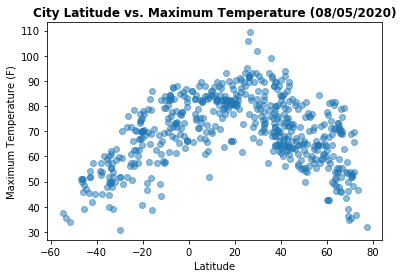

<Figure size 864x432 with 0 Axes>

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Max Temp (F)"], color = "tab:blue", alpha=0.5)

# Titles
plt.title("City Latitude vs. Maximum Temperature (08/05/2020)", fontweight = "black")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('output_data/CityLatVsMaxTemp.png')
plt.show()

This graph shows that as you get closer to the equator, the maximum temperature increases. This also shows that as you get further from the equator, the maximum temperature decreases.

## Latitude vs. Humidity Plot

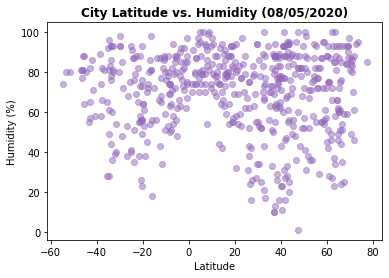

<Figure size 864x432 with 0 Axes>

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Humidity (%)"], color = "tab:purple", alpha=0.5)

# Titles
plt.title("City Latitude vs. Humidity (08/05/2020)", fontweight = "black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('output_data/CityLatVsHumidity.png')
plt.show()

This graph shows that the percent humidity is highly variable regardless of latitude. Datapoints are more similar, however, closer to the equator.

## Latitude vs. Cloudiness Plot

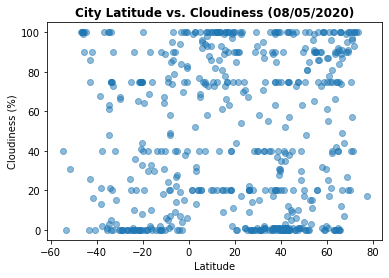

<Figure size 864x432 with 0 Axes>

In [14]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Cloudiness (%)"], color = "tab:blue", alpha=0.5)

# Titles
plt.title("City Latitude vs. Cloudiness (08/05/2020)", fontweight = "black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('output_data/CityLatVsCloudiness.png')
plt.show()

This graph shows that the percent cloudiness is highly variable regardless of lattitude, with the least cloudy places being near the equator and poles.

## Latitude vs. Wind Speed Plot

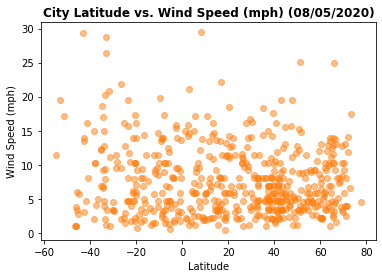

<Figure size 864x432 with 0 Axes>

In [15]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Wind Speed (mph)"], color = "tab:orange", alpha=0.5)

# Titles
plt.title("City Latitude vs. Wind Speed (mph) (08/05/2020)", fontweight = "black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('output_data/CityLatVsWindSpeed.png')
plt.show()

This graph demonstrates that wind speed is highly variable regardless of lattitude.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def latitude_lin_regress(df, title_name, y, equationplot):   #, regress_file_name
    x_values = df['Lat']
    y_values = df[y] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, equationplot ,fontsize=15,color="red")
    plt.title(title_name)
    plt.xlabel('Latitude')
    plt.ylabel(y)
#     plt.savefig(regress_file_name)
    print(f"The r-squared is: {rvalue**2}") 
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames by using .loc
north_hem_df = cleaned_weather_df.loc[(cleaned_weather_df["Lat"] >= 0) & (cleaned_weather_df["Lat"] <= 90)]

south_hem_df = cleaned_weather_df.loc[(cleaned_weather_df["Lat"] >= -90) & (cleaned_weather_df["Lat"] <= 0)]

north_hem_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
2,jamestown,42.1,-79.24,55.99,93,1,4.7,US,1596688370
3,cherskiy,68.75,161.3,57.78,59,95,7.56,RU,1596688460
5,sabha,27.04,14.43,83.55,16,0,9.64,LY,1596688624
6,norman wells,65.28,-126.83,59,87,75,4.7,CA,1596688506
10,atuona,45.02,-93.22,66.2,72,40,5.46,US,1596688626


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3720287129401342


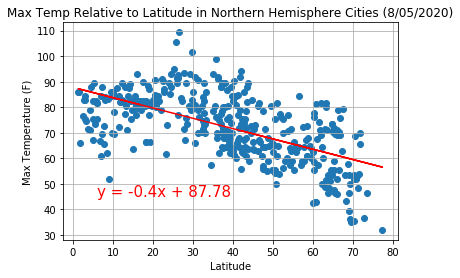

In [38]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Max Temp Relative to Latitude in Northern Hemisphere Cities (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/NorthHemMaxTempVsLat.png')
plt.show()


This plot shows that there is a weak, negative correlation between maximum temperature and latitude in the northern hemisphere. Furthermore, suggesting that cities further from the equator generally have cooler temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5400970942799482


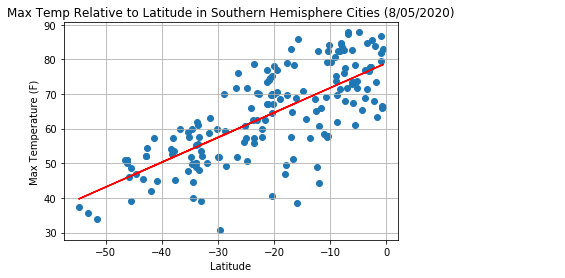

In [40]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Max Temp Relative to Latitude in Southern Hemisphere Cities (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/SouthHemMaxTempVsLat.png')
plt.show()


This plot shows that there is a moderate, positive correlation between maximum temperature and latitude in the southern hemisphere. Furthermore, suggesting that cities closer to the equator have warmer temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0158469083286327


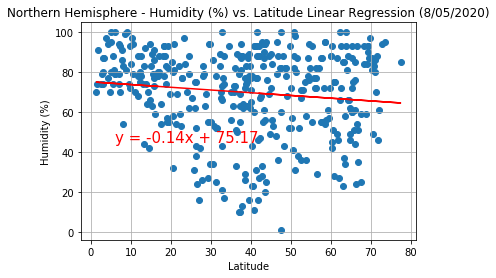

In [41]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/NorthHemHumidVsLat.png')
plt.show()


This plot shows changes in humidity saturation across latitudinal values in the northern hemisphere. Although there is a very weak, negative correlation, there is a cluster of lower humidity in the mid-range latitudes.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000956226880203043


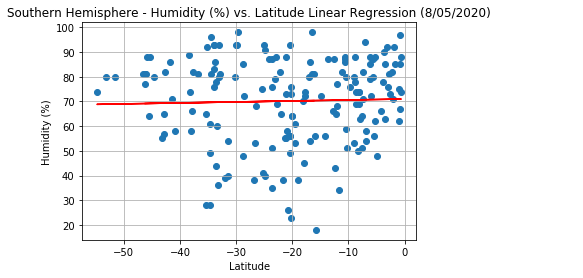

In [42]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/SouthHemHumidVsLat.png')
plt.show()

This plot shows changes in humidity saturation across latitudinal values in the southern hemisphere. There practically no correlation between humidity and latitude here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002292010877086894


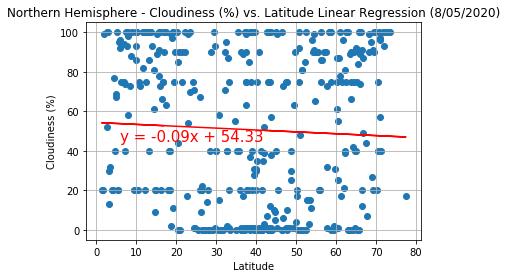

In [43]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/NorthHemCloudVsLat.png')
plt.show()

This plot shows changes in cloud cover across the northern hemisphere, suggesting that this is extremely variable. There is no correlation between these two values.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0021843863173319905


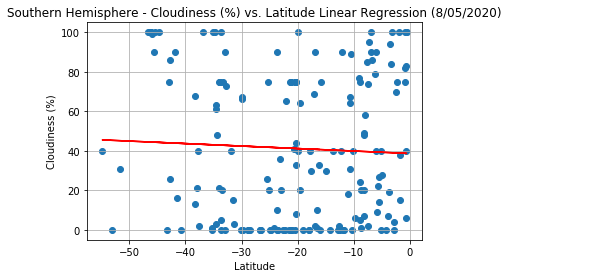

In [44]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/SouthHemCloudVsLat.png')
plt.show()

This plot shows changes in cloud cover across the southern hemisphere, suggesting that this is extremely variable. There is no correlation between these two values.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011865601897093326


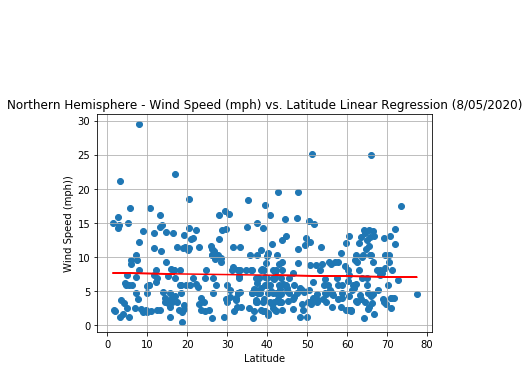

In [45]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/NorthHemWindVsLat.png')
plt.show()

This plot examines changes in wind speed across latitudes in the northern hemisphere. The low r-squared value suggests that there is no correlation between these two values.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02445327761291881


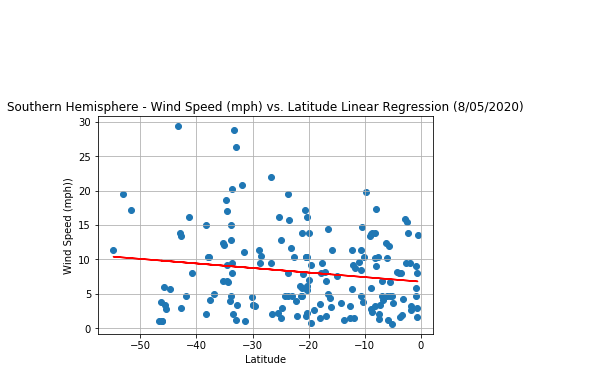

In [46]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.tolist(), y_values.tolist())
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (8/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/SouthHemWindVsLat.png')
plt.show()

This plot examines changes in wind speed across latitudes in the southern hemisphere. The low r-squared value suggests that there is no correlation between these two values.